In [23]:
#import Cell
import os
import pandas as pd
import numpy as np
from webscraper import crawl
from embeddings import *
from context import *
from config import OPENAI_KEY
openai.api_key = OPENAI_KEY

# Part 1 : WebCrawler

In [24]:
HTTP_URL_PATTERN = r'^http[s]*://.+'

domain = "pwc.com" # <- put your domain to be crawled
full_url = "https://pwc.com/" # <- put your domain to be crawled with https or http

crawl(full_url)


https://pwc.com/
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)>
All Pages Scraped


# Part 2 : Building Embeddings index

In [25]:
# Create a list to store the text files
texts=[]

# Get all the text files in the text directory
for file in os.listdir("text/" + domain + "/"):

    # Open the file and read the text
    with open("text/" + domain + "/" + file, "r", encoding="UTF-8") as f:
        text = f.read()

        # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
        texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = df.fname + ". " + remove_newlines(df.text)
df.to_csv('processed/scraped.csv')
df.head()

/Users/alejandrolopez/DataspellProjects/OpenAI Projects/OpenAi Research/embeddings.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


,fname,text
0,,". PwC: Audit and assurance, consulting and ..."


<AxesSubplot: >

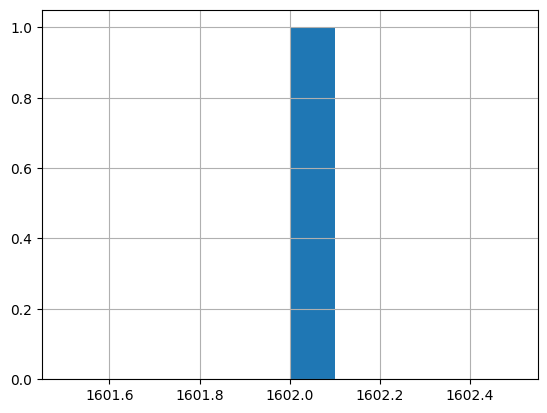

In [26]:
# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

In [27]:
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]

    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks

In [28]:
shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])

    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

<AxesSubplot: >

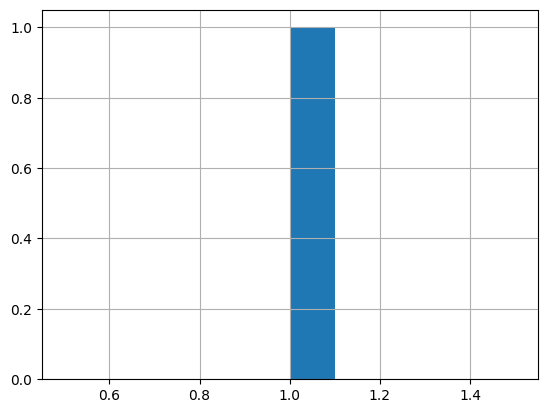

In [29]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.n_tokens.hist()

In [30]:

df['embeddings'] = df.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])
df.to_csv('processed/embeddings.csv')
df.head()

,text,n_tokens,embeddings
0,.,1,"[-0.008761508390307426, -0.016880812123417854,..."


In [31]:
df=pd.read_csv('processed/embeddings.csv', index_col=0)
df['embeddings'] = df['embeddings'].apply(eval).apply(np.array)

df.head()

,text,n_tokens,embeddings
0,.,1,"[-0.008761508390307426, -0.016880812123417854,..."


In [32]:
user_question = str(input("Ask Question about {website}".format(website = domain)))
print(user_question)
answer_question(df,question = user_question)

what does pwc do?


'PwC is a professional services network that provides assurance, tax, and consulting services to its clients.'

In [16]:
user_question2 = str(input("Ask a Question about {website}".format(website = domain)))
print(user_question2)
answer_question(df,question = user_question2)

"I don't know."

In [17]:
user_question3 = str(input("Ask a Question about {website}".format(website = domain)))
print(user_question3)
answer_question(df,question = user_question3)

"I don't know."

In [18]:
user_question4 = str(input("Ask a Question about {website}".format(website = domain)))
print(user_question4)
answer_question(df,question = user_question4)

"I don't know."

In [19]:
user_question5 = str(input("Ask a Question about {website}".format(website = domain)))
print(user_question5)
answer_question(df,question = user_question5)


KeyboardInterrupt



In [ ]:
user_question6 = str(input("Ask a Question about {website}".format(website = domain)))
print(user_question6)
answer_question(df,question = user_question6)

# Part 4: Experimenting

In [21]:
user_question7 = str(input("Ask a Question about {website}".format(website = domain)))
print(user_question7)
answer_question_modifed(df,question = user_question7)

what files do i need to file taxes?


NameError: name 'answer_question_modifed' is not defined

In [ ]:
user_question8 = str(input("Ask a Question about {website}".format(website = domain)))
print(user_question8)
answer_question_modifed(df,question = user_question8)

In [ ]:
user_question9 = str(input("Ask a Question about {website}".format(website = domain)))
print(user_question9)
answer_question_modifed(df,question = user_question9)

In [ ]:
user_question10 = str(input("Ask a Question about {website}".format(website = domain)))
print(user_question10)
answer_question_modifed(df,question = user_question10)

In [ ]:
user_question11 = str(input("Ask a Question about {website}".format(website = domain)))
print(user_question11)
answer_question_modifed(df,question = user_question11)